# **Redes Convolucionales**
### Por **Josmar Dominguez** (16-10315)

## Evaluate Model
En este notebook se evalua el modelo con el dataset de test y se visualiza el deseempeño del modelo.

#### **Importar librerias**
Se importan las librerías para cargar el modelo, cargar el dataset y para visualizar los datos. 

In [3]:
import torch
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

#### **Cargar dataset de test**

Files already downloaded and verified


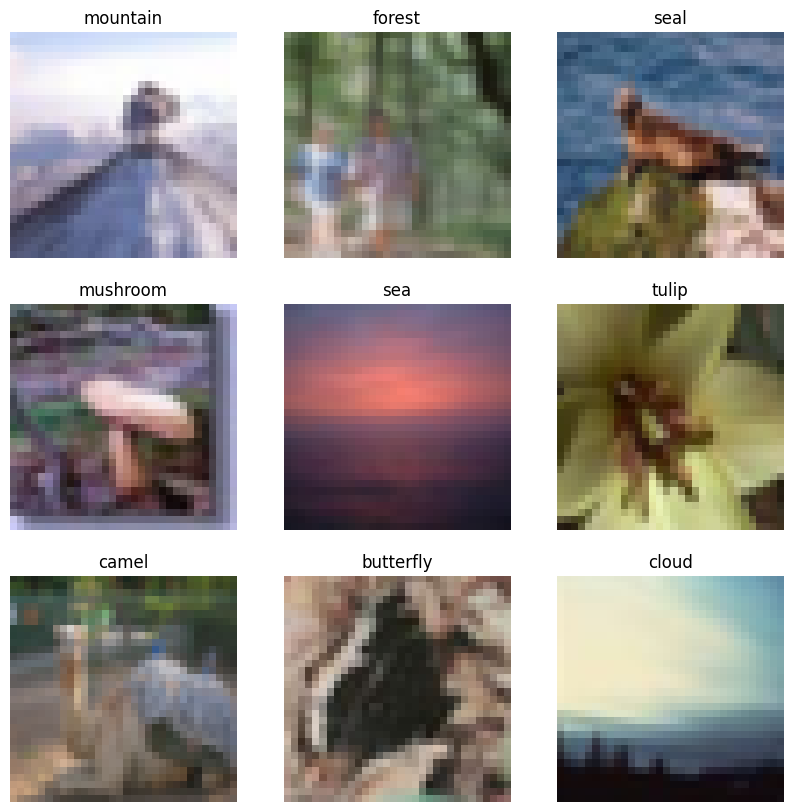

In [4]:
# Load the CIFAR100 test dataset
test_data = datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create dictionary of class names
dict_labels = test_data.class_to_idx
dict_ids = {v: k for k, v in dict_labels.items()}

# Visualize a grid with 3 x 3 images
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(9):
    ax[i // 3][i % 3].imshow(test_data[i][0].permute(1, 2, 0))
    ax[i // 3][i % 3].set_title(dict_ids[test_data[i][1]])
    ax[i // 3][i % 3].axis("off")
plt.show()

#### **Cargar modelo y evaluar**

In [7]:
# Load model from models/vgg16.pt
model = models.vgg16(pretrained=False)

# Change the last layer to output 100 classes
model.classifier[-1] = torch.nn.Linear(4096, 100)

model.load_state_dict(torch.load("models/vgg16.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [12]:
# Create dataloader
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# Create a confusion matrix
confusion_matrix = torch.zeros(100, 100)

# Create a dictionary to store the number of correct predictions per class
correct_predictions = {label: 0 for label in dict_ids.values()}

# Create a dictionary to store the number of predictions per class
total_predictions = {label: 0 for label in dict_ids.values()}

c = 0
for images, labels in test_loader:
    # Get the predicted class
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Add the prediction to the confusion matrix
    confusion_matrix[labels, predicted] += 1
    
    labels = labels.item()

    # Add the prediction to the correct predictions dictionary
    if labels == predicted:
        correct_predictions[dict_ids[labels]] += 1

    # Add the prediction to the total predictions dictionary
    total_predictions[dict_ids[labels]] += 1
    
    c += 1
    
    # Print progress every 1000 images
    if c % 500 == 0:
        print(f'Images processed: {c} ({c / len(test_data) * 100:.2f}%)')
    
# Print the confusion matrix
accuracy = sum(correct_predictions.values()) / sum(total_predictions.values())
print(f'Accuracy for test set (all classes): {accuracy:.4f}')

Images processed: 500 (5.00%)
Images processed: 1000 (10.00%)
Images processed: 1500 (15.00%)
Images processed: 2000 (20.00%)
Images processed: 2500 (25.00%)
Images processed: 3000 (30.00%)
Images processed: 3500 (35.00%)
Images processed: 4000 (40.00%)
Images processed: 4500 (45.00%)
Images processed: 5000 (50.00%)
Images processed: 5500 (55.00%)
Images processed: 6000 (60.00%)
Images processed: 6500 (65.00%)
Images processed: 7000 (70.00%)
Images processed: 7500 (75.00%)
Images processed: 8000 (80.00%)
Images processed: 8500 (85.00%)
Images processed: 9000 (90.00%)
Images processed: 9500 (95.00%)
Images processed: 10000 (100.00%)
Accuracy for test set (all classes): 0.6439


In [13]:
all_labels = list(dict_ids.values())

# Plot confusion matrix
# Create a figure
fig, ax = plt.subplots(figsize=(100, 100))
plt.imshow(confusion_matrix, cmap='hot')
plt.colorbar()
plt.xticks(range(100), all_labels, rotation=90)
plt.yticks(range(100), all_labels)
for i in range(100):
    for j in range(100):
        ax.text(j, i, int(confusion_matrix[i, j]), ha='center', va='center', color='white')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

Text(0, 0.5, 'True label')

#### **Mapa caracteristico de la primera capa convolucional**
Se eligirán 10 clases aleatorias, y se visualizará el mapa caracteristico de la primera capa convolucional para cada una de estas clases.
Con esto se busca visualizar que caracteristicas de la imagen se estan extrayendo para determinar la clase de la imagen.

['chimpanzee', 'camel', 'bee', 'telephone', 'woman', 'bicycle', 'girl', 'motorcycle', 'lamp', 'house']


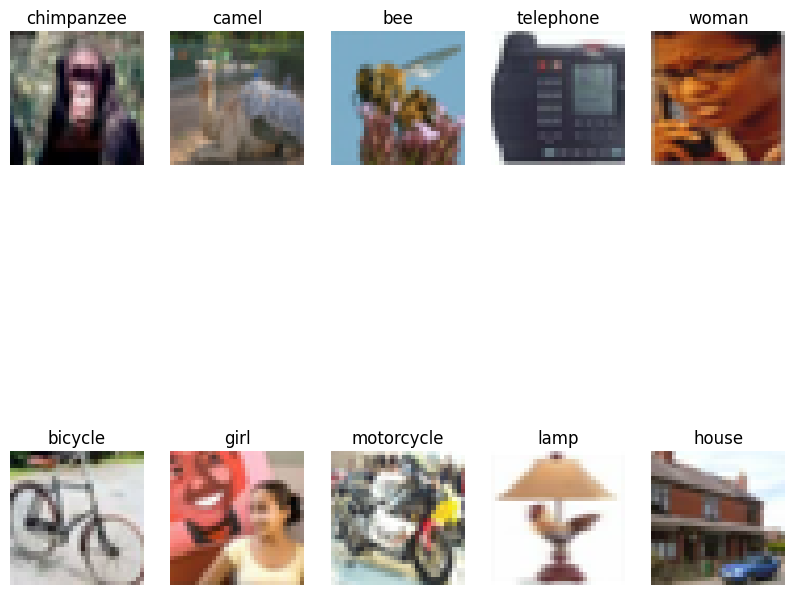

In [22]:
# Get 10 random clases
import random
random_classes = random.sample(all_labels, 10)
print(random_classes)

# Get one image per class
images = []
while len(images) < 10:
    for cls in random_classes:
        for image, label in test_data:
            if dict_ids[label] == cls:
                images.append(image)
                break

# Visualize a grid with 2 x 5 images
fig, ax = plt.subplots(2, 5, figsize=(10, 10))
for i in range(10):
    ax[i // 5][i % 5].imshow(images[i].permute(1, 2, 0))
    ax[i // 5][i % 5].set_title(random_classes[i])
    ax[i // 5][i % 5].axis("off")
plt.show()

Predicted class: chimpanzee
Actual class: chimpanzee


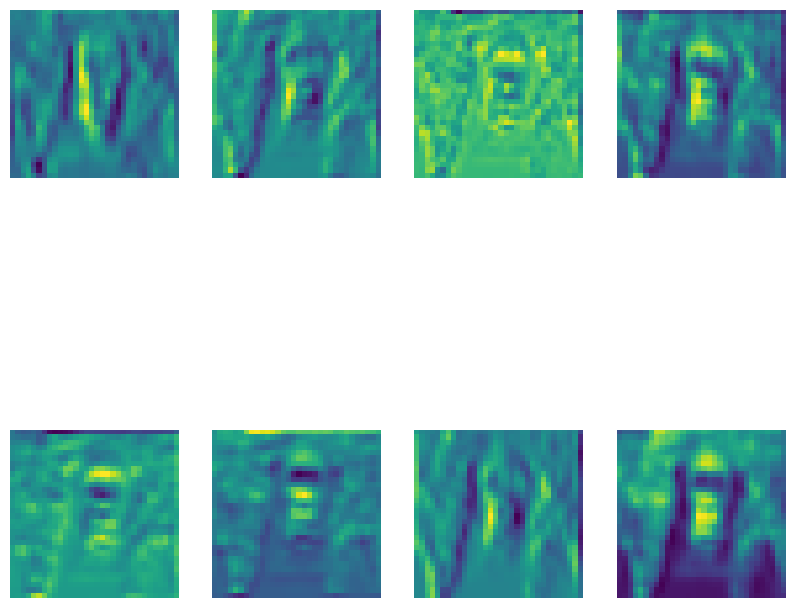

Predicted class: rabbit
Actual class: camel


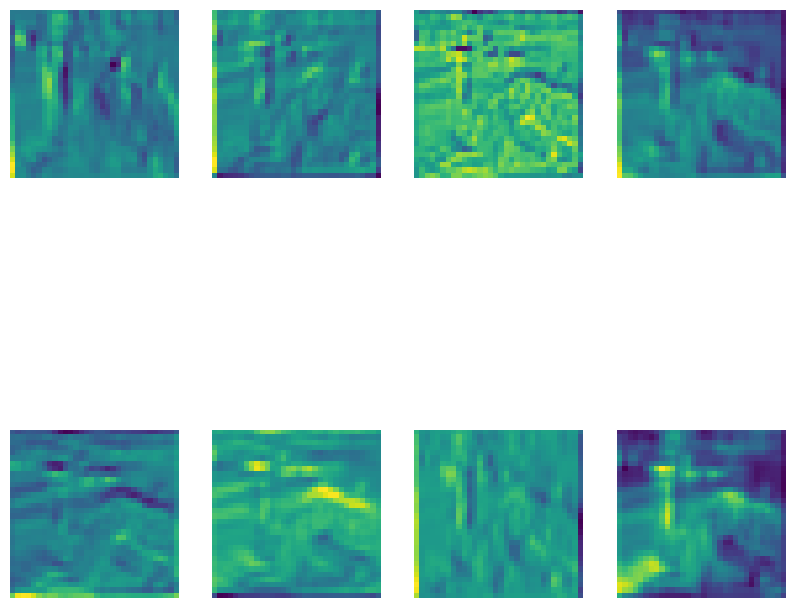

Predicted class: lobster
Actual class: bee


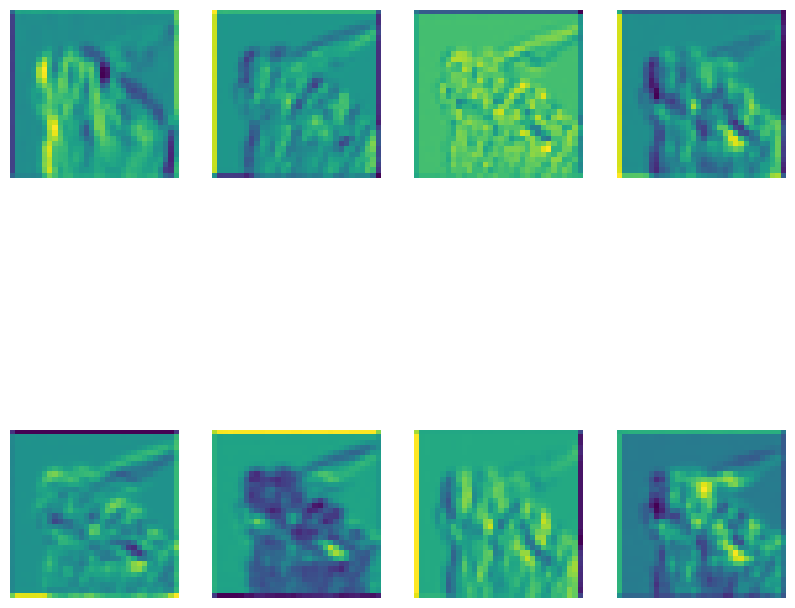

Predicted class: telephone
Actual class: telephone


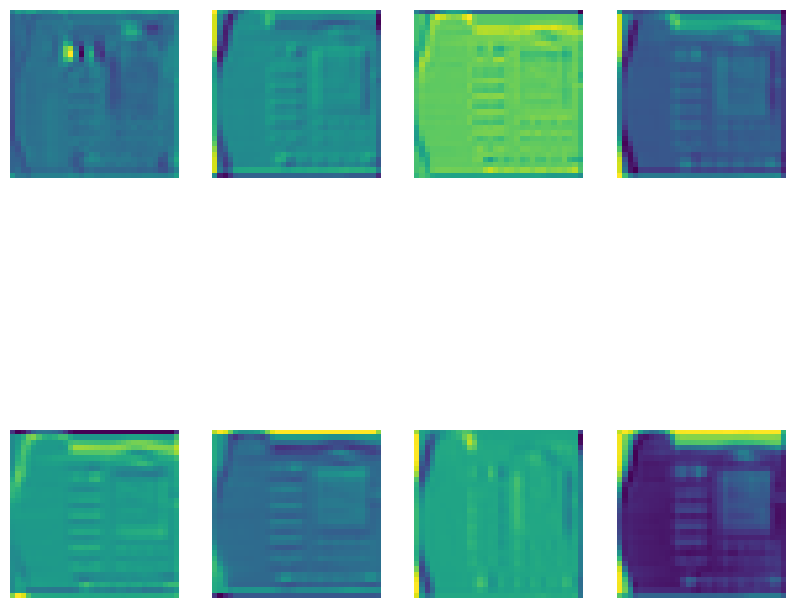

Predicted class: woman
Actual class: woman


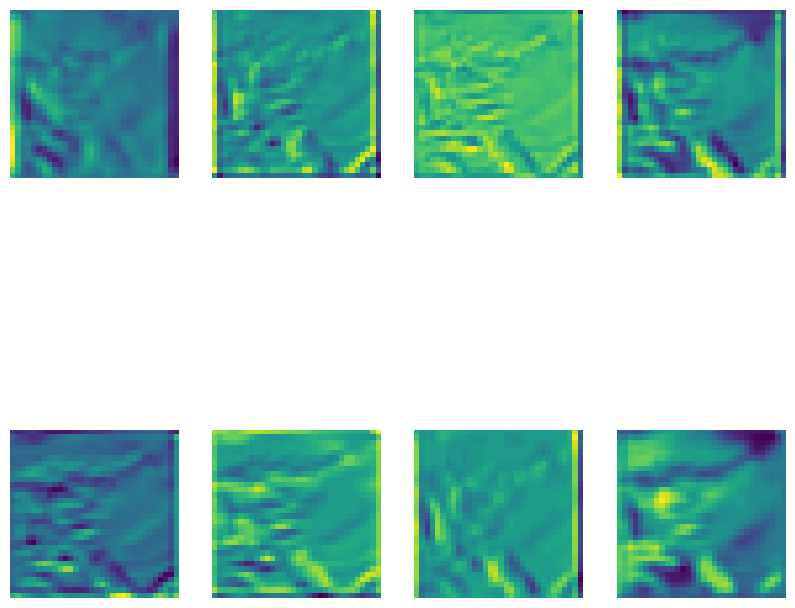

Predicted class: bicycle
Actual class: bicycle


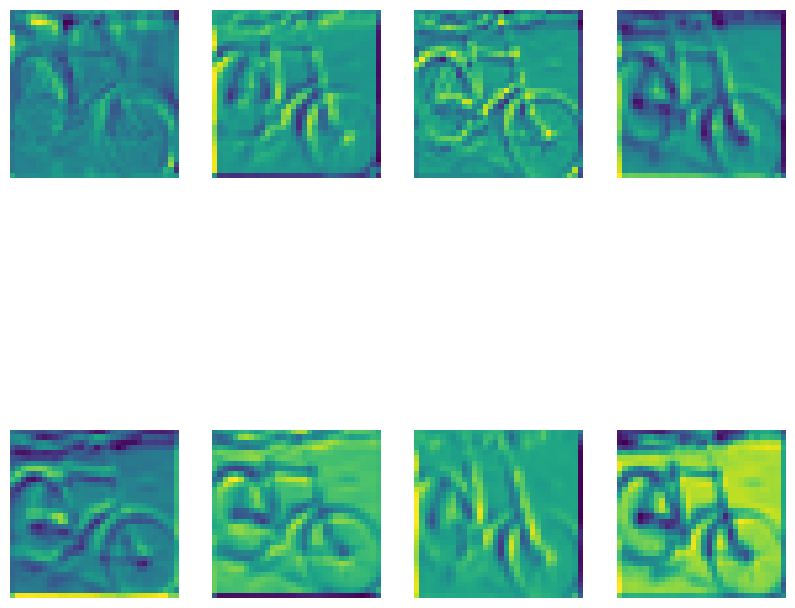

Predicted class: boy
Actual class: girl


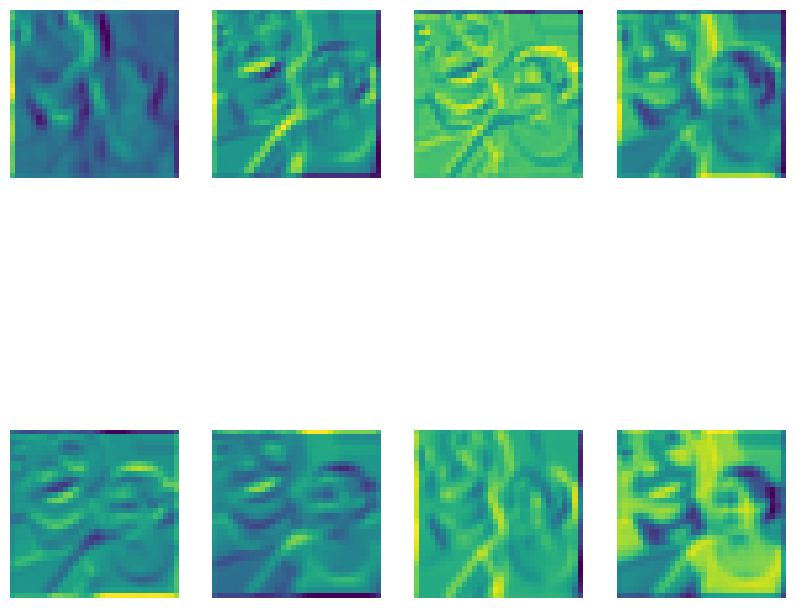

Predicted class: motorcycle
Actual class: motorcycle


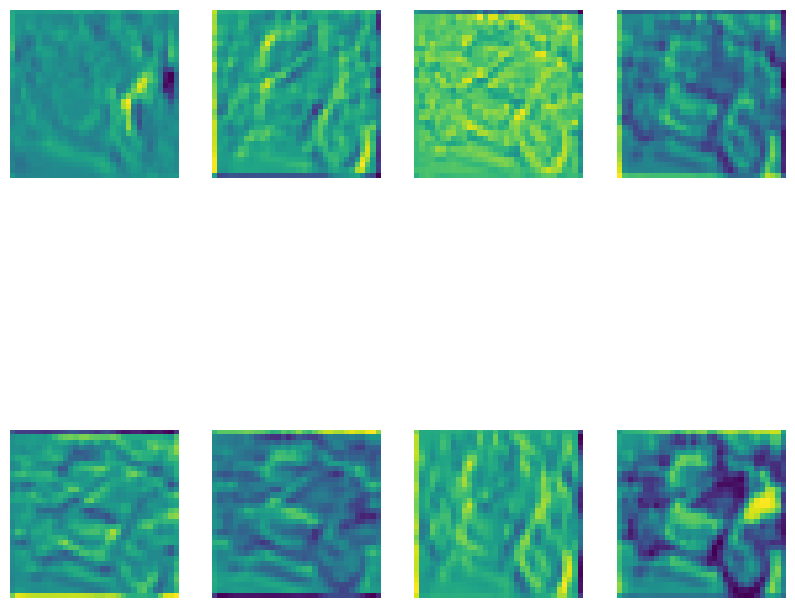

Predicted class: lamp
Actual class: lamp


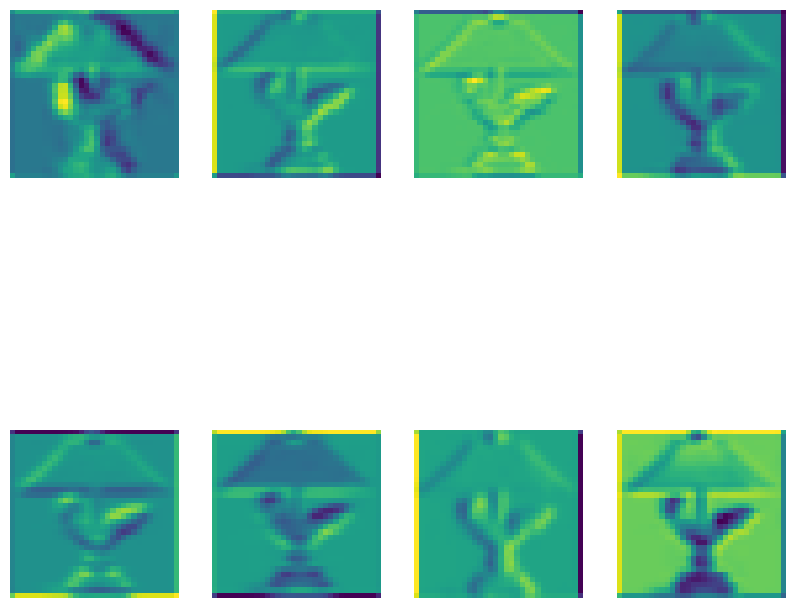

Predicted class: house
Actual class: house


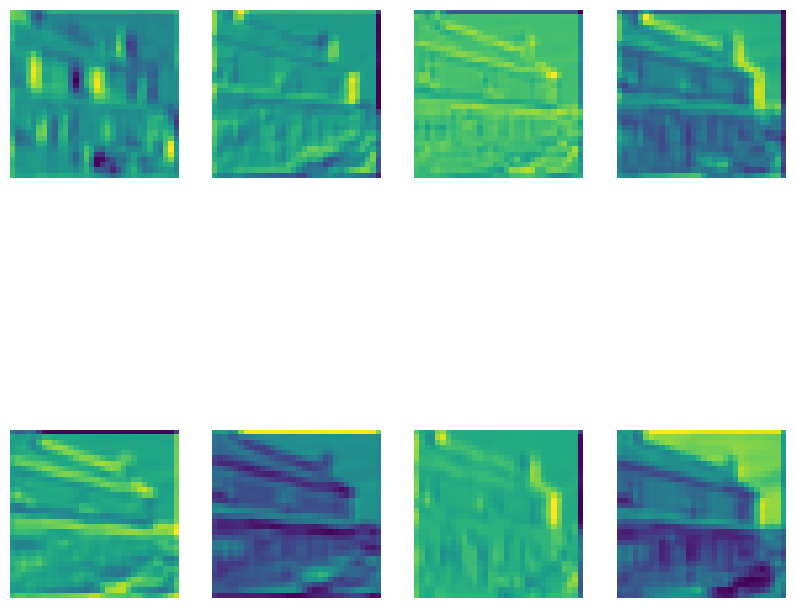

In [26]:
# View the activation for the first convolutional layer for each image
for i in range(10):
    image = images[i]
    label = random_classes[i]
    
    activation = model.features[0](image.unsqueeze(0))
    
    pred = model(image.unsqueeze(0))
    
    _, predicted = torch.max(pred.data, 1)
    
    print(f'Predicted class: {dict_ids[predicted.item()]}')
    print(f'Actual class: {label}')
    
    fig, ax = plt.subplots(2, 4, figsize=(10, 10))
    for i in range(8):
        ax[i // 4][i % 4].imshow(activation[0][i].detach().numpy())
        ax[i // 4][i % 4].axis("off")
    plt.show()
